In [36]:
import numpy as np
csv_path="mtfuji_data.csv"
np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
# fuji[:50]

## 【問題1】データの可視化

Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

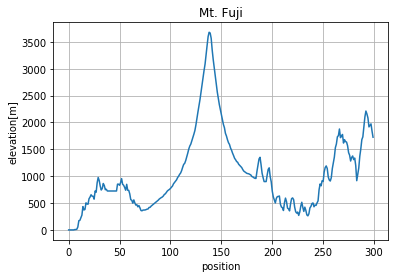

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

x = fuji[:, 0]
y = fuji[:, 3]

# plt.xlim([,])
# plt.ylim([,])
plt.title('Mt. Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]', rotation=90)
plt.grid()

plt.plot(x, y)
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [33]:
def compute_next_slope(mountain_data, current_point):
    '''
    現在位置から、次の地点までの勾配を返す。

    Parameters
    ----------------
    mountain_data : object(ndarray)
    csvファイルから出力した標高データ
    
    current_point : int
    今いる地点の番号
    
    Returns
    ----------------
    next_slope_gradient : int
    今いる地点から番号-1した地点までの勾配
    
    '''
    # xの変化量は1.0単位なので、変化量を求める式は省略する。
    # yの変化量を以下で求める。
    slope_diff_array = mountain_data[:, 3][1:] - mountain_data[:, 3][:-1]
    # slope_diff_arrayに全ての勾配数が格納される。
    
    next_slope_gradient = slope_diff_array[current_point]
    # 今いる地点(current_point)をインデックスとした数値が求めている勾配になる。
    
    return next_slope_gradient


In [34]:
# testing
compute_next_slope(fuji, 10)

6.280000000000001

## 【問題3】移動先の地点を計算する関数を作成

今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - α × 今いる地点の勾配」 となります。

In [4]:
from decimal import Decimal, ROUND_HALF_UP

def compute_next_point(current_point, hyper_parameter, mountain_data, function):
    '''
    今いる地点、今いる地点の勾配から学習率を経た移動先の地点を求める。
    
    Parameters
    ----------------
    current_point : int
    今いる地点の番号
    
    hyper_parameter : float
    指定した学習率。（0より大きい）
    
    mountain_data : object(ndarray)
    使用する標高データ。
    
    function: function
    current_pointから算出された「今いる地点の勾配」を返す関数。
    
    Returns
    ----------------
    next_point : int
    次の移動先の地点を返す。
    
    '''
    # 学習率が０以上であれば、関数が実行される。
    if hyper_parameter > 0:
        pre_next_point = current_point - hyper_parameter * function(mountain_data, current_point)
        # 算出された数字が０以上あれば、次の計算（四捨五入）が実行される。
        if pre_next_point > 0:
            round_point = Decimal(pre_next_point).quantize(Decimal('0'), ROUND_HALF_UP)
            next_point = int(round_point)
            return next_point
        else:
            return
    else:
        return
    

In [5]:
# Testing
compute_next_point(10, 0.2, fuji, compute_next_slope)

9

## 【問題4】山を下る関数を作成

山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

In [6]:
def climbing_down(current_point, hyper_parameter, mountain_data, function):
    '''
    山を下る際、最初の地点から凡そ平地に辿り着くまでの地点のリストを返す。
    
    Parameters
    ----------------
    current_point : int
    今いる地点の番号
    
    hyper_parameter : float
    指定した学習率。（0より大きい）
    
    mountain_data : object(ndarray)
    使用する標高データ。
    
    function: function
    current_pointから算出された「今いる地点の勾配」を返す関数。
    
    Returns
    ----------------
    list_of_point : list
    リスト化された軌跡
    
    '''
    # 代数を事前定義する。
    list_of_point = [current_point]
    next_point = 0
    previous_point = current_point
    
    # 条件：「次の地点」と「前（現在地）の地点」が等しくなるまで、以下の計算を実施する。
    # 「前の地点」に「現在地」を代入する。
    # compute_next_point関数を用いて、「次の地点」を算出する。
    # 「次の地点」をリスト list_of_pointに追加する。
    # 「次の地点」を「現在地」に代入する。
    # 「現在地」が代入された「次の地点」と「前の地点」を比較する。
    # 以降、ループする。
    
    while next_point != previous_point:
        previous_point = current_point
        next_point = compute_next_point(current_point, hyper_parameter, mountain_data, function)
        list_of_point.append(next_point)
        current_point = next_point 
        
    return list_of_point

In [7]:
try:
    answer = climbing_down(136, 0.2, fuji, compute_next_slope)
except:
    print('Error')

answer

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74, 74]

## 【問題5】下山過程の可視化

問題4における下山過程をMatplotlibを使いグラフで可視化してください。

＜条件＞
* 断面図の中に移動した地点を点で表示する
* 繰り返し毎の標高や勾配を折れ線グラフにする

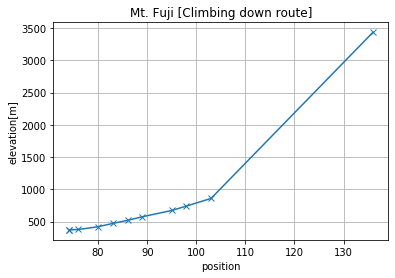

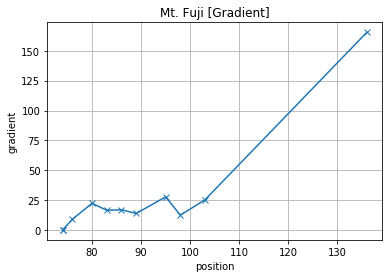

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

list_of_point = climbing_down(136, 0.2, fuji, compute_next_slope)

slope_diff_array = fuji[:, 3][1:] - fuji[:, 3][:-1]


x = fuji[:, 0][list_of_point]
y = fuji[:, 3][list_of_point]
z = slope_diff_array[list_of_point]


# 移動した地点での標高を返すグラフ

# plt.xlim([,])
# plt.ylim([,])
plt.title('Mt. Fuji [Climbing down route]')
plt.xlabel('position')
plt.ylabel('elevation[m]', rotation=90)
plt.grid()

plt.plot(x, y, marker="x")
plt.show()

# 移動した地点での勾配を返すグラフ
plt.title('Mt. Fuji [Gradient]')
plt.xlabel("position")
plt.ylabel("gradient")
plt.grid()

plt.plot(x, z, marker="x")
plt.show()

## 【問題6】初期値の変更

問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

初期値を地点100まで計算した、ポイント軌跡は以下の通り。

[[1, 1], [2, 2], [3, 3], [4, 4], [5, 4, 4], [6, 6], [7, 6, 6], [11, 1, 1], [12, 3, 3], [14, 26, 30, 50, 40, 40], [17, 21, 12, 3, 3], [18, 20, 14, 26, 30, 50, 40, 40], [20, 14, 26, 30, 50, 40, 40], [21, 12, 3, 3], [23, 23], [24, 35, 51, 36, 34, 42, 42], [26, 30, 50, 40, 40], [29, 40, 40], [30, 50, 40, 40], [31, 46, 46], [32, 26, 30, 50, 40, 40], [33, 14, 26, 30, 50, 40, 40], [34, 42, 42], [35, 51, 36, 34, 42, 42], [36, 34, 42, 42], [37, 43, 43], [38, 38], [39, 39], [40, 40], [41, 41], [42, 42], [43, 43], [44, 44], [45, 45], [46, 46], [47, 21, 12, 3, 3], [48, 48], [49, 53, 57, 79, 79], [50, 40, 40], [51, 36, 34, 42, 42], [52, 73, 73], [53, 57, 79, 79], [54, 62, 73, 73], [55, 65, 73, 73], [56, 34, 42, 42], [57, 79, 79], [58, 58], [59, 72, 69, 77, 76, 74, 74], [60, 82, 79, 79], [61, 63, 51, 36, 34, 42, 42], [62, 73, 73], [63, 51, 36, 34, 42, 42], [64, 75, 74, 74], [65, 73, 73], [66, 65, 73, 73], [67, 75, 74, 74], [68, 63, 51, 36, 34, 42, 42], [69, 77, 76, 74,

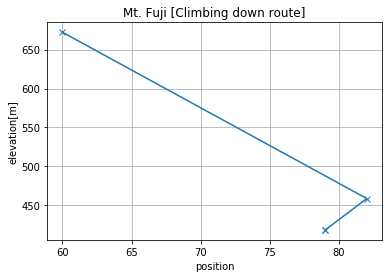

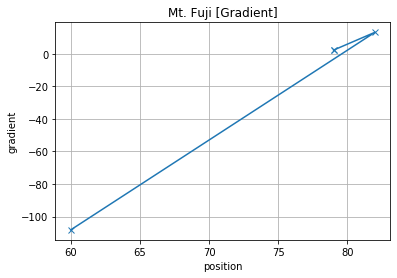

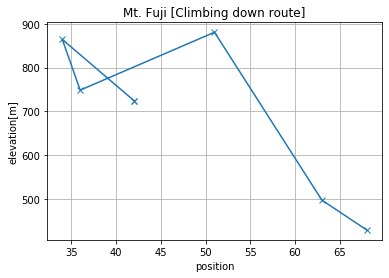

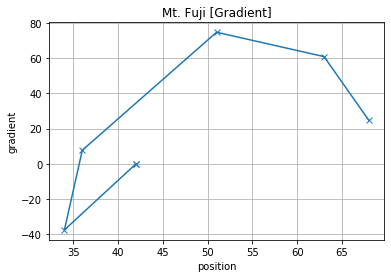

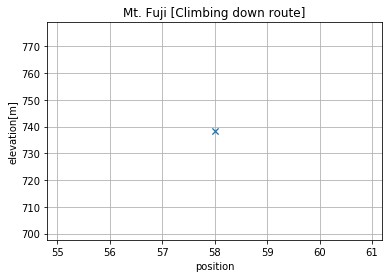

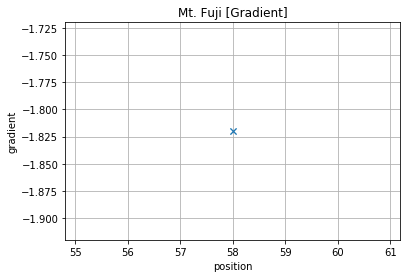

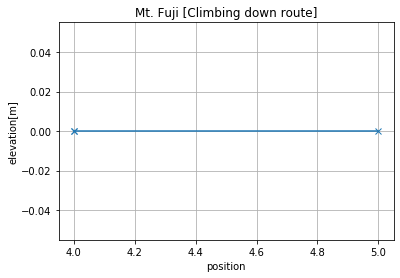

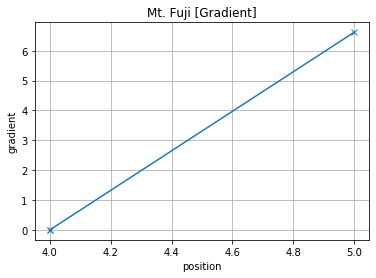

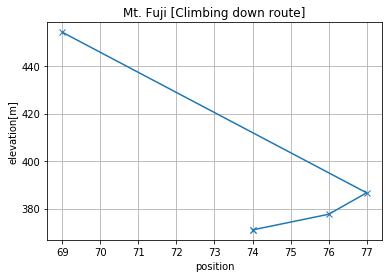

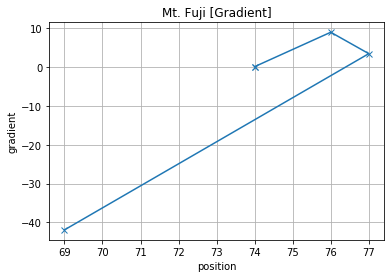

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

fuji_int = len(fuji[:, 0])
# indexが300あるので、ここでは100とする。

final_list = []
starting_int = 0

for i in range(100):
    starting_int += 1
    try:
        climbing_down(starting_int, 0.2, fuji, compute_next_slope)
        list_of_point = climbing_down(starting_int, 0.2, fuji, compute_next_slope)
        final_list.append(list_of_point)
    except:
        continue
# 1-100までにランダムな数字を５つ選び、リストに格納する。

num_to_select = 5
list_of_random_number = random.sample(range(100), num_to_select)


print("初期値を地点100まで計算した、ポイント軌跡は以下の通り。\n\n{}".format(final_list))

print("\nランダムで選択した初期値のリスト{}に基づいた各グラフは以下の通り。",format(list_of_random_number))
print("\nエラーが出現した場合は初期値が負数のため、再度実行する必要あり。")
for i in range(num_to_select):
    
    list_of_point = climbing_down(list_of_random_number[i], 0.2, fuji, compute_next_slope)

    slope_diff_array = fuji[:, 3][1:] - fuji[:, 3][:-1]


    x = fuji[:, 0][list_of_point]
    y = fuji[:, 3][list_of_point]
    z = slope_diff_array[list_of_point]

    # 移動した地点での標高を返すグラフ

    plt.title('Mt. Fuji [Climbing down route]')
    plt.xlabel('position')
    plt.ylabel('elevation[m]', rotation=90)
    plt.grid()

    plt.plot(x, y, marker="x")
    plt.show()

    # 移動した地点での勾配を返すグラフ
    plt.title('Mt. Fuji [Gradient]')
    plt.xlabel("position")
    plt.ylabel("gradient")
    plt.grid()

    plt.plot(x, z, marker="x")
    plt.show()


## 【問題7】（アドバンス問題）ハイパーパラメータの変更

ハイパーパラメータ α を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# 問題５を関数化
# ポイント初期値は136のまま、ハイパーパラメーターのみを引数とする。

def testing_hyper_parameter(parameter):
    list_of_point = climbing_down(136, parameter, fuji, compute_next_slope)

    slope_diff_array = fuji[:, 3][1:] - fuji[:, 3][:-1]


    x = fuji[:, 0][list_of_point]
    y = fuji[:, 3][list_of_point]
    z = slope_diff_array[list_of_point]


    # 移動した地点での標高を返すグラフ

    # plt.xlim([,])
    # plt.ylim([,])
    plt.title('Mt. Fuji [Climbing down route]')
    plt.xlabel('position')
    plt.ylabel('elevation[m]', rotation=90)
    plt.grid()

    plt.plot(x, y, marker="x")
    plt.show()

    # 移動した地点での勾配を返すグラフ
    plt.title('Mt. Fuji [Gradient]')
    plt.xlabel("position")
    plt.ylabel("gradient")
    plt.grid()

    plt.plot(x, z, marker="x")
    plt.show()
    

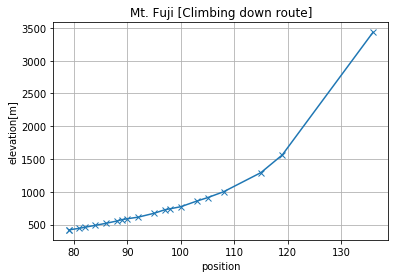

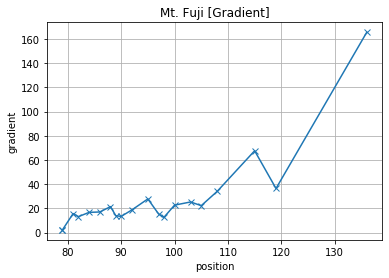

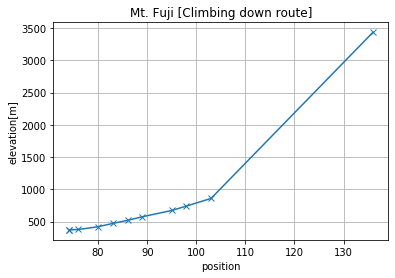

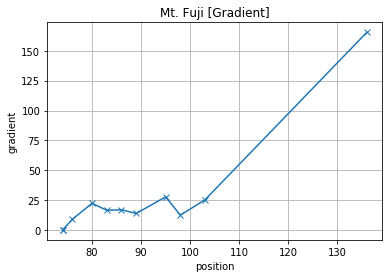

In [32]:
# ハイパーパラメーターを0.1, 0.2で比較した場合。

testing_hyper_parameter(0.1)
testing_hyper_parameter(0.2)

# 0.1は移動地点ごとの標高差はなだらかに見えるが、勾配の上下は0.2と比較して上下激しく見える。

# 0.2以降は処理が終了しなかった。